In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
diabete_df=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [5]:
#Cleaning_data
#There were no Null_Values in the DataSet
#To understand How Many Rows are duplicated
diabete_df.duplicated(subset=['Diabetes_012','HighBP','HighChol','CholCheck','BMI','Smoker','Stroke',
                              'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth',
                              'PhysHlth','DiffWalk','Sex','Age','Education','Income']).sum()

23899

In [6]:
#clean duplicated rows and resetting the index
diabete_df_clean=diabete_df.drop_duplicates()
diabete_df_clean.reset_index(drop=True,inplace=True)
diabete_df_clean

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229776,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
229777,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
229778,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
229779,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [7]:
#Diabete Status
# No Diabete=0
# Pre Diabete=1
# Diabete = 2
diabete_type_detection=diabete_df_clean['Diabetes_012']
diabete_df_clean.loc[diabete_type_detection==0,'Disease Status']='No Diabete'
diabete_df_clean.loc[diabete_type_detection==1,'Disease Status']='Pre Diabete'
diabete_df_clean.loc[diabete_type_detection==2,'Disease Status']='Diabete'
#Look at distribution of members
diabete_df_clean['Disease Status'].value_counts()

C:\Users\ghadi\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\ghadi\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


No Diabete     190055
Diabete         35097
Pre Diabete      4629
Name: Disease Status, dtype: int64

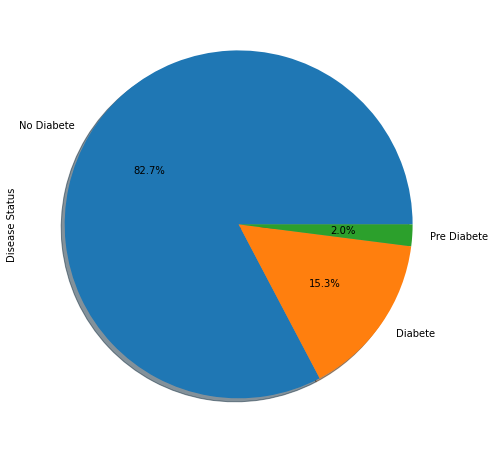

In [8]:
diabete_df_clean['Disease Status'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

In [9]:
#Decesion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn import metrics

In [10]:
x = diabete_df_clean.iloc[:, [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values  
y = diabete_df_clean.iloc[:, 0].values 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
abc = DecisionTreeClassifier(random_state=2)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy using DecisionTree:",metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy using DecisionTree: 75.59875244795822 %


In [12]:
#Model 2 : Naive-Bayse
from sklearn import metrics
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix  

In [13]:
x = diabete_df_clean.iloc[:, [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values  
y = diabete_df_clean.iloc[:, 0].values  

x1 = diabete_df_clean.iloc[:, [1]].values  
x2 = diabete_df_clean.iloc[:, [2]].values
x3 = diabete_df_clean.iloc[:, [3]].values
x4 = diabete_df_clean.iloc[:, [4]].values
x5 = diabete_df_clean.iloc[:, [5]].values
x6 = diabete_df_clean.iloc[:, [6]].values
x7 = diabete_df_clean.iloc[:, [7]].values
x8 = diabete_df_clean.iloc[:, [8]].values
x9 = diabete_df_clean.iloc[:, [9]].values
x10 = diabete_df_clean.iloc[:, [10]].values
x11 = diabete_df_clean.iloc[:, [11]].values
x12 = diabete_df_clean.iloc[:, [12]].values
x13 = diabete_df_clean.iloc[:, [13]].values
x14 = diabete_df_clean.iloc[:, [14]].values
x15 = diabete_df_clean.iloc[:, [15]].values
x16 = diabete_df_clean.iloc[:, [16]].values
x17 = diabete_df_clean.iloc[:, [17]].values
x18 = diabete_df_clean.iloc[:, [18]].values
x19 = diabete_df_clean.iloc[:, [19]].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  

In [15]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test) 

In [16]:
y_pred = classifier.predict(x_test) 
print(y_pred)

[2. 0. 0. ... 0. 2. 2.]


In [17]:
cm = confusion_matrix(y_test, y_pred)  
print(cm)

[[37472   253  9550]
 [  663     5   477]
 [ 3821   110  5095]]


In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7410785781429516


In [19]:
#Use adaboosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
x = diabete_df_clean.iloc[:, [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values  
y = diabete_df_clean.iloc[:, 0].values 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
Adaboost_Classifier = AdaBoostClassifier(n_estimators=70,learning_rate=1)

In [22]:
model = Adaboost_Classifier.fit(x_train, y_train)


In [23]:
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy: 83.54536882570538 %


In [24]:
#Until Now, I used 3 MODELS
#Decesion tree=75.2 %, 
#NaiveBayes=74.1%
#Adaboosting=83.2%
#The max Model was Related to Adaboosting with 83.21 Percent Accuracy
#####################################################################
#The Second approach is to use a dataframe which (pre-diabete/diabete/no-diabete) observations are equal
#And investigate the Models

In [25]:
#Second Approch
#Having the same number of observations in each category and analyze it
diabete_df_clean

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Disease Status
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,No Diabete
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,No Diabete
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,No Diabete
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,No Diabete
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,No Diabete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229776,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,No Diabete
229777,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,Diabete
229778,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,No Diabete
229779,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,No Diabete


In [26]:
#Creating New DataFrame Containing Only Observations with Pre Diabetes
Prediabete_df=diabete_df_clean[diabete_df_clean['Diabetes_012']==1]
Prediabete_df['Diabetes_012'].value_counts()
#Since it has Only 4629 rows, we want to contain these Observations and create other data frames
#based on these

1.0    4629
Name: Diabetes_012, dtype: int64

In [27]:
#Creating New DataFrame Containing Only Observations with Diabetes
diabete_df_new=diabete_df_clean[diabete_df_clean['Diabetes_012']==2]
diabete_df_new['Diabetes_012'].value_counts()
diabete_df_new

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Disease Status
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0,Diabete
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0,Diabete
13,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0,Diabete
17,2.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0,Diabete
23,2.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0,Diabete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229760,2.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0,Diabete
229769,2.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0,Diabete
229771,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0,Diabete
229777,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,Diabete


In [28]:
#Random Selecting of the above DataFrame (diabete_df)
diabete_newsample_df = diabete_df_new.sample(n=4629,replace=False)
diabete_newsample_df['Diabetes_012'].value_counts()
diabete_newsample_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Disease Status
227282,2.0,0.0,1.0,1.0,32.0,1.0,0.0,0.0,0.0,1.0,...,0.0,3.0,30.0,6.0,0.0,0.0,9.0,6.0,5.0,Diabete
66664,2.0,1.0,1.0,1.0,35.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,10.0,5.0,4.0,Diabete
70534,2.0,0.0,0.0,1.0,21.0,0.0,1.0,1.0,0.0,1.0,...,0.0,3.0,20.0,20.0,1.0,0.0,13.0,4.0,3.0,Diabete
113538,2.0,1.0,1.0,1.0,28.0,1.0,1.0,1.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,8.0,3.0,4.0,Diabete
168129,2.0,0.0,1.0,1.0,21.0,0.0,0.0,0.0,1.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,10.0,5.0,2.0,Diabete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126232,2.0,1.0,1.0,1.0,23.0,1.0,0.0,1.0,0.0,0.0,...,0.0,4.0,0.0,6.0,0.0,1.0,12.0,4.0,6.0,Diabete
92242,2.0,0.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,5.0,Diabete
27022,2.0,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0,Diabete
174221,2.0,1.0,1.0,1.0,37.0,1.0,0.0,0.0,0.0,1.0,...,0.0,4.0,0.0,0.0,0.0,1.0,12.0,4.0,2.0,Diabete


In [29]:
#Creating New DataFrame Containing Only Observations with Non Diabetes
Nondiabete_df=diabete_df_clean[diabete_df_clean['Diabetes_012']==0]
Nondiabete_df['Diabetes_012'].value_counts()
#Random Selecting of the above DataFrame (Nondiabete_df)
Nondiabete_newsample_df = Nondiabete_df.sample(n=4629,replace=False)
Nondiabete_newsample_df['Diabetes_012'].value_counts()
Nondiabete_newsample_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Disease Status
82644,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0,No Diabete
203494,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,14.0,1.0,1.0,10.0,5.0,6.0,No Diabete
127924,0.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,0.0,1.0,0.0,0.0,9.0,6.0,8.0,No Diabete
218296,0.0,1.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,0.0,...,0.0,3.0,0.0,2.0,0.0,0.0,9.0,6.0,8.0,No Diabete
84862,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,8.0,5.0,6.0,No Diabete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171425,0.0,1.0,1.0,1.0,32.0,0.0,1.0,1.0,1.0,1.0,...,0.0,3.0,0.0,2.0,1.0,1.0,8.0,4.0,4.0,No Diabete
213516,0.0,1.0,0.0,1.0,34.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,1.0,7.0,4.0,2.0,No Diabete
109984,0.0,0.0,1.0,1.0,22.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,6.0,4.0,5.0,No Diabete
152982,0.0,1.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,4.0,No Diabete


In [30]:
#combined_equal_df=pd.merge(Prediabete_df,Nondiabete_newsample_df,diabete_newsample_df,on='Diabete_012')
combined_equal_df = pd.concat([Prediabete_df,diabete_newsample_df,Nondiabete_newsample_df], axis=0, join='inner')

In [31]:
combined_equal_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,13887.0,1.00,0.82,0.0,0.0,1.0,2.0,2.0
HighBP,13887.0,0.59,0.49,0.0,0.0,1.0,1.0,1.0
HighChol,13887.0,0.56,0.50,0.0,0.0,1.0,1.0,1.0
CholCheck,13887.0,0.98,0.15,0.0,1.0,1.0,1.0,1.0
BMI,13887.0,30.18,7.16,13.0,26.0,29.0,33.0,98.0
Smoker,13887.0,0.49,0.50,0.0,0.0,0.0,1.0,1.0
Stroke,13887.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,13887.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
PhysActivity,13887.0,0.69,0.46,0.0,0.0,1.0,1.0,1.0
Fruits,13887.0,0.60,0.49,0.0,0.0,1.0,1.0,1.0


In [32]:
combined_equal_df = combined_equal_df.sample(frac=1).reset_index(drop=True)
combined_equal_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Disease Status
0,0.0,0.0,1.0,0.0,37.0,1.0,0.0,0.0,0.0,1.0,...,1.0,3.0,0.0,0.0,0.0,0.0,8.0,5.0,3.0,No Diabete
1,2.0,1.0,1.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,0.0,4.0,20.0,5.0,0.0,0.0,13.0,6.0,6.0,Diabete
2,1.0,1.0,1.0,1.0,36.0,1.0,0.0,0.0,1.0,0.0,...,0.0,4.0,2.0,15.0,0.0,1.0,9.0,5.0,6.0,Pre Diabete
3,0.0,1.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,27.0,1.0,0.0,12.0,6.0,6.0,No Diabete
4,0.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,7.0,No Diabete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13882,1.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,3.0,0.0,0.0,0.0,5.0,6.0,6.0,Pre Diabete
13883,0.0,0.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0,7.0,No Diabete
13884,0.0,1.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,1.0,No Diabete
13885,0.0,1.0,0.0,1.0,18.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,10.0,5.0,3.0,No Diabete


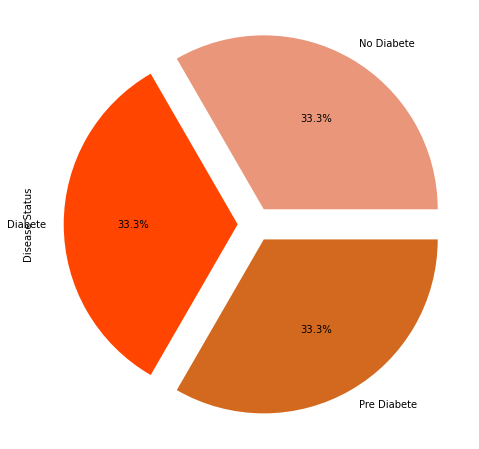

In [33]:
colors=['darksalmon', 'orangered','chocolate']
combined_equal_df['Disease Status'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',colors=colors,shadow=False,figsize=  (10,8))
plt.show()

In [34]:
#Use adaboosting for new data-frame
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [35]:
x = combined_equal_df.iloc[:, [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values  
y = combined_equal_df.iloc[:, 0].values 

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
Adaboost_Classifier = AdaBoostClassifier(n_estimators=70,learning_rate=1)

In [37]:
model = Adaboost_Classifier.fit(x_train, y_train)

In [38]:
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy: 49.76958525345622 %


In [39]:
#Decesion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn import metrics

In [40]:
x = combined_equal_df.iloc[:, [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values  
y = combined_equal_df.iloc[:, 0].values 

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
abc = DecisionTreeClassifier(random_state=2)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy using DecisionTree:",metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy using DecisionTree: 41.34869210463163 %


In [42]:
#The Accuracy in second approach decreased drammaticaly
#Decision tree:42.09%
#Adaboosting:50.7%


In [43]:
#Approach 3
#Removing PreDiabetes from dataframe (Having only Diabete and NoDiabete) and evaluating the Accuracy prediction
NonPreDiabete_df=diabete_df_clean.drop(diabete_df_clean.index[diabete_df_clean['Diabetes_012'] == 1])
NonPreDiabete_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Disease Status
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,No Diabete
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,No Diabete
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,No Diabete
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,No Diabete
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,No Diabete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229776,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,No Diabete
229777,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,Diabete
229778,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,No Diabete
229779,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,No Diabete


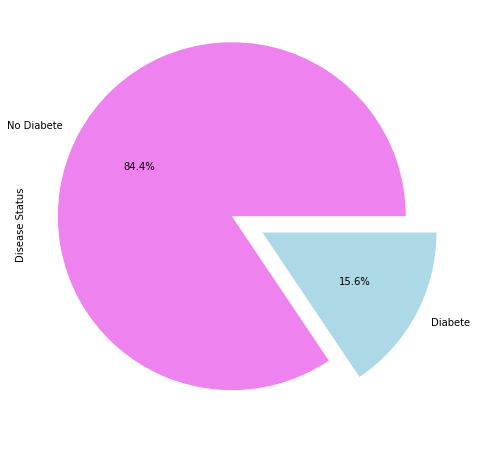

In [44]:
colors=['violet','lightblue']
NonPreDiabete_df['Disease Status'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',colors=colors,shadow=False,figsize=  (10,8))
plt.show()

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [49]:
x = NonPreDiabete_df.iloc[:, [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values  
y = NonPreDiabete_df.iloc[:, 0].values 

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
Adaboost_Classifier = AdaBoostClassifier(n_estimators=70,learning_rate=1)

In [51]:
model = Adaboost_Classifier.fit(x_train, y_train)

In [52]:
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy: 85.03094187664702 %


In [53]:
#The Third Approach shows increasing accuracy around 2 percent, from 83% (dataframe with prediabete) to 85% dataframe without diabete

In [56]:
#Approach 4 ( Convert PreDiabete to Diabete in diabete_df_clean)
#converting PreDiabete to Diabete in diabete_df_clean
#How to replace a value in a column (change 1 to 2 in Diabetes_012 column of DataFrame)
diabete_df_clean['Diabetes_012'].replace(1,2,inplace=True)

C:\Users\ghadi\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


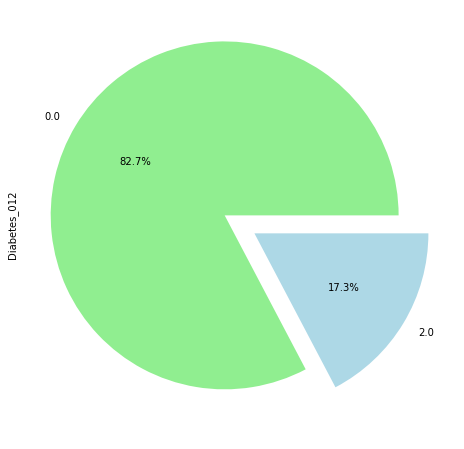

In [57]:
colors=['lightgreen','lightblue']
diabete_df_clean['Diabetes_012'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',colors=colors,shadow=False,figsize=  (10,8))
plt.show()

In [58]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [59]:
x = diabete_df_clean.iloc[:, [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values  
y = diabete_df_clean.iloc[:, 0].values 

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
Adaboost_Classifier = AdaBoostClassifier(n_estimators=70,learning_rate=1)

In [61]:
model = Adaboost_Classifier.fit(x_train, y_train)

In [62]:
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy: 83.66142017842895 %


In [ ]:
#The 4th Approach shows the same accuracy with the second approach, arround 83.5% 